# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [77]:
# Dependencies set up
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import requests
import time
from config import weather_api_key

# Import citipy
from citipy import citipy




In [32]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lngs in lat_lngs:
    city = citipy.nearest_city(lat_lngs[0],lat_lngs[1]).city_name
    
# Add unique cities to city list
    if city not in cities:
        cities.append(city)

# Work out total number of cities to make sure it's 500 or more cities are taken
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:

#Create the query url for the API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Creat list to hold API data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Making API calls in each cities
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

for city in cities: 
     # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


ne
Processing Record 469 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e7bed27bb8e1b579139db0463e071cb8&q=katsuura
Processing Record 470 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e7bed27bb8e1b579139db0463e071cb8&q=richards bay
Processing Record 471 | Waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e7bed27bb8e1b579139db0463e071cb8&q=waipawa
Processing Record 472 | Vidim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e7bed27bb8e1b579139db0463e071cb8&q=vidim
Processing Record 473 | Visnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e7bed27bb8e1b579139db0463e071cb8&q=visnes
Processing Record 474 | Riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e7bed27bb8e1b579139db0463e071cb8&q=riyadh
Processing Record 475 | Antigonish
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e7bed27bb8e1b579139db0463e071cb8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
# Creat a dictionary to hold lists 
data={
    "City": city_name,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp, 
    "Humidity": humidity,
    "Cloudiness":cloudiness, 
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}

# Creat Dataframe with the dictionaries above
weather_data = pd.DataFrame(data)

# show dataframe
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,66.20,72,75,3.44,US,1612599418
1,Ngunguru,-35.6167,174.5000,68.00,80,97,3.00,NZ,1612599420
2,Avarua,-21.2078,-159.7750,77.00,94,62,1.14,CK,1612599422
3,Port Alfred,-33.5906,26.8910,73.99,88,91,4.00,ZA,1612599423
4,Pevek,69.7008,170.3133,-10.35,87,100,1.70,RU,1612599425


In [42]:
# Save the data as csv
weather_data.to_csv('Output/cities.csv')

In [44]:
# calling describe method 
desc = weather_data.describe() 
  
# display 
desc 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,6.030000e+02
mean,21.016117,19.548859,49.859569,73.149254,56.543947,8.057247,1.612600e+09
std,33.102618,89.837849,32.067504,21.550627,40.467853,5.612014,2.969747e+02
min,-54.800000,-179.166700,-45.400000,11.000000,0.000000,0.250000,1.612599e+09
25%,-4.260150,-59.658300,27.700000,64.500000,8.000000,3.660000,1.612600e+09
50%,26.354400,25.776200,59.540000,79.000000,75.000000,6.530000,1.612600e+09
75%,49.100300,100.457300,77.000000,88.500000,97.500000,10.940000,1.612600e+09
max,78.218600,179.316700,96.010000,100.000000,100.000000,31.250000,1.612600e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [71]:
#  Get the indices of cities that have humidity over 100%.
indexNames = weather_data[weather_data['Humidity'] > 100 ].index
indexNames

# Drop the row with 100% Humidiy by droping the indexnames from above
weather_data.drop(indexNames , inplace=True)
weather_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,66.20,72,75,3.44,US,1612599418
1,Ngunguru,-35.6167,174.5000,68.00,80,97,3.00,NZ,1612599420
2,Avarua,-21.2078,-159.7750,77.00,94,62,1.14,CK,1612599422
3,Port Alfred,-33.5906,26.8910,73.99,88,91,4.00,ZA,1612599423
4,Pevek,69.7008,170.3133,-10.35,87,100,1.70,RU,1612599425
...,...,...,...,...,...,...,...,...,...
597,Vao,-22.6667,167.4833,78.33,85,0,8.28,NC,1612600407
598,Lagoa,39.0500,-27.9833,58.66,86,100,17.56,PT,1612600408
599,Tabou,4.4230,-7.3528,80.96,85,71,4.27,CI,1612600410
600,Atbasar,51.8000,68.3333,32.20,96,100,15.66,KZ,1612600412


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

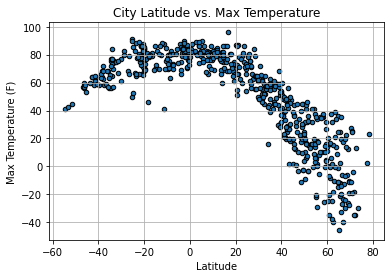

In [64]:
# Build a scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="black",s=20)

# Set plot style
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

# This shows max temperature goes higher when it's closer to equation line

## Latitude vs. Humidity Plot

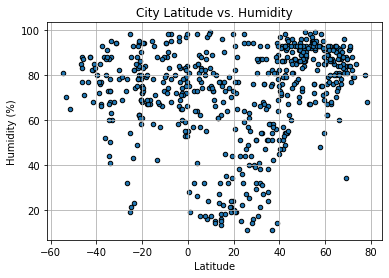

In [65]:
# Build a scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black",s=20)

# Set plot style
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Humidity_vs_Latitude.png")

# Show plot
plt.show()

# there is clear corelation between latitude and humidity. Howere humidity tends to be higher in the artic/antarctic area.

## Latitude vs. Cloudiness Plot

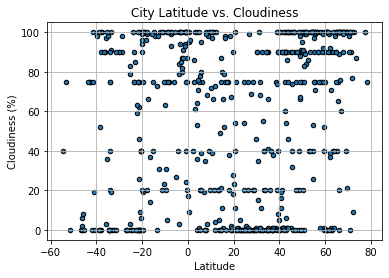

In [66]:
# Build a scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors="black",s=20)

# Set plot style
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

# There is no clear corelation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

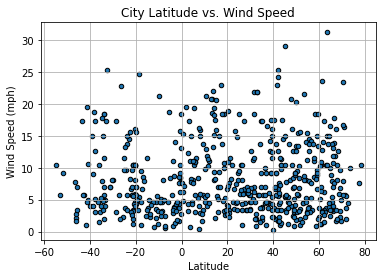

In [67]:
# Build a scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="black",s=20)

# Set plot style
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Wind_speed_vs_Latitude.png")

# Show plot
plt.show()

# Could not observe a clear corelations between wind speed and latitude.

## Linear Regression

In [75]:
# Creat a subset of cities that are in Northern Hemisphere for ploting
north_cities=weather_data.loc[weather_data["Lat"]>=0]


# # Creat a subset to hold cities in Southern Hemisphere for ploting later
south_cities=weather_data.loc[weather_data["Lat"]<0]



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Ngunguru,-35.6167,174.5000,68.00,80,97,3.00,NZ,1612599420
2,Avarua,-21.2078,-159.7750,77.00,94,62,1.14,CK,1612599422
3,Port Alfred,-33.5906,26.8910,73.99,88,91,4.00,ZA,1612599423
5,Rikitea,-23.1203,-134.9692,77.25,74,85,14.47,PF,1612599427
7,Uncia,-18.4670,-66.5685,46.33,79,96,5.39,BO,1612599430


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7875953217616443


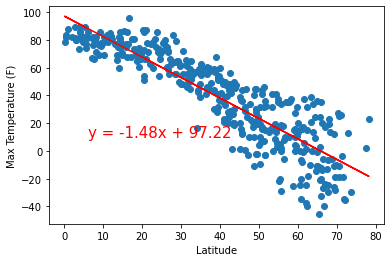

In [79]:
 # Northern Hemisphere - Max Temp vs Latitude Linear regression
 

x_values = north_cities['Lat']
y_values = north_cities['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# R-squared value high indicate strong corelation between latitude and max temp in Northern hamisphere. Closer to equation line gets higher temperature. 

In [88]:
# Save the figure
plt.savefig("Output/north_Max_Temp_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.34978666034206257


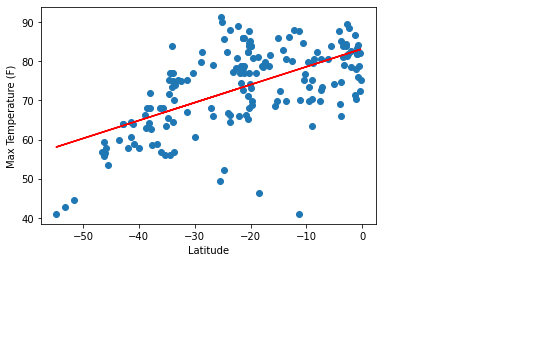

In [81]:
# Plot scatter with a linear regression
x_values = south_cities['Lat']
y_values = south_cities['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# there are less cities in sourthern hamisphere however it still show consistent corelation between latitude and Max temp. closer to equation line gets higher temp. 

In [89]:
# Save the figure
plt.savefig("Output/south_Max_Temp_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20992711046635065


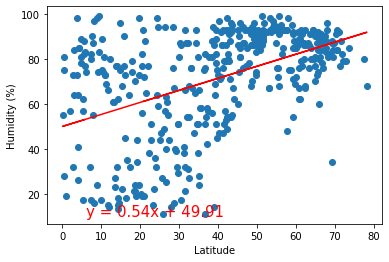

In [82]:
# Plot scatter with a linear regression
x_values = north_cities['Lat']
y_values = north_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# when it's closer to equation line the numidity gets higher however when it moves to artic area not a strong corelation. 

In [90]:
# Save the figure
plt.savefig("Output/north_humidity_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.6104091450343564e-05


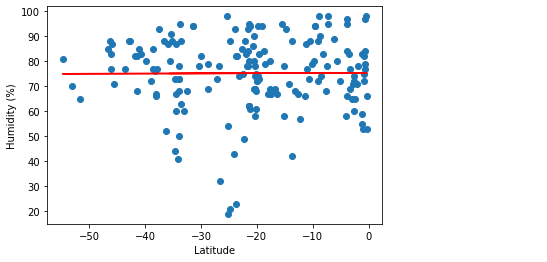

In [83]:
# Plot scatter with a linear regression
x_values = south_cities['Lat']
y_values = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# In sourth hamishpere the latitude does not seem to have strong effect on humidity. 

In [91]:
# Save the figure
plt.savefig("Output/south_humidity_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09954051175395795


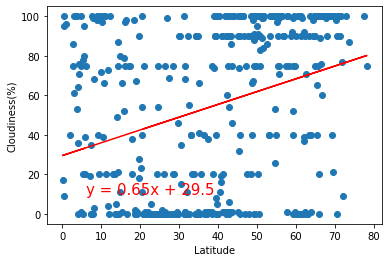

In [84]:
# Plot scatter with a linear regression
x_values = north_cities['Lat']
y_values = north_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# there is not evidence of correlation between latitude and cloudiness

In [92]:
# Save the figure
plt.savefig("Output/north_cloudiness_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1140090566909009


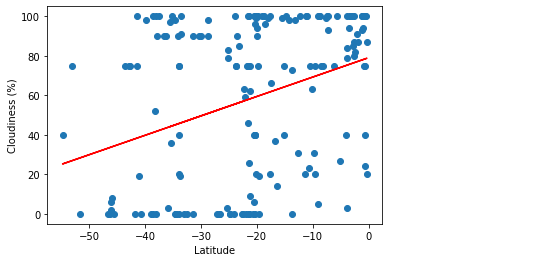

In [85]:
# Plot scatter with a linear regression
x_values = south_cities['Lat']
y_values = south_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# there is not evidence of correlation between latitude and cloudiness

In [93]:
# Save the figure
plt.savefig("Output/south_cloudiness_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003698622799865078


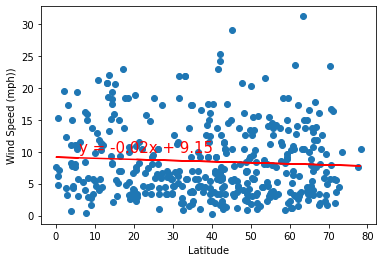

In [86]:
# Plot scatter with a linear regression
x_values = north_cities['Lat']
y_values = north_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# No evidence of corelation between wind speed and latitude.

In [94]:
# Save the figure
plt.savefig("Output/noth_wind_speed_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023862650847095355


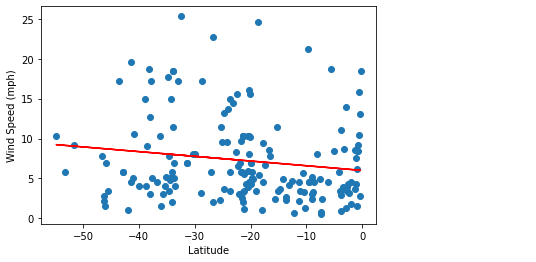

In [87]:
# Plot scatter with a linear regression
x_values = south_cities['Lat']
y_values = south_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# No evidence of corelation between wind speed and latitude.

In [95]:
# Save the figure
plt.savefig("Output/south_wind_speed_vs_Latitude.png")

<Figure size 432x288 with 0 Axes>